In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
data = pd.read_csv("/Users/aryanmanchanda/Projects/aura-check/Data/DASS Responses/data.csv", delimiter="\t")
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [231]:
questions = []
for i in data.columns:
    if i.startswith("Q") and i.endswith("A"):
        questions.append(i)

In [232]:
questions

['Q1A',
 'Q2A',
 'Q3A',
 'Q4A',
 'Q5A',
 'Q6A',
 'Q7A',
 'Q8A',
 'Q9A',
 'Q10A',
 'Q11A',
 'Q12A',
 'Q13A',
 'Q14A',
 'Q15A',
 'Q16A',
 'Q17A',
 'Q18A',
 'Q19A',
 'Q20A',
 'Q21A',
 'Q22A',
 'Q23A',
 'Q24A',
 'Q25A',
 'Q26A',
 'Q27A',
 'Q28A',
 'Q29A',
 'Q30A',
 'Q31A',
 'Q32A',
 'Q33A',
 'Q34A',
 'Q35A',
 'Q36A',
 'Q37A',
 'Q38A',
 'Q39A',
 'Q40A',
 'Q41A',
 'Q42A']

In [233]:
depression_questions = ["Q3A", "Q5A", "Q10A", "Q13A", "Q16A", "Q17A", "Q21A", "Q24A", "Q26A", "Q31A", "Q34A","Q37A", "Q38A", "Q42A"]
anxiety_questions = ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A"]
stress_questions = ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"]

words = ["VCL1", "VCL2", "VCL3", "VCL4","VCL5", "VCL7", "VCL8", "VCL10", "VCL11", "VCL13", "VCL14", "VCL15", "VCL16"]

In [234]:
data["depression_score"] = data[depression_questions].sum(axis =1)
data["anxiety_score"] = data[anxiety_questions].sum(axis=1)
data["stress_score"] = data[stress_questions].sum(axis=1)

data["extraversion"] = data["TIPI1"] - data["TIPI6"]
data["agreeableness"] = data["TIPI7"] - data["TIPI2"]
data["conscientiousness"] = data["TIPI3"] - data["TIPI8"]
data["emotional_stability"] = data["TIPI9"] - data["TIPI4"]
data["openness"] = data["TIPI5"] - data["TIPI10"]

In [235]:
data.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,familysize,major,depression_score,anxiety_score,stress_score,extraversion,agreeableness,conscientiousness,emotional_stability,openness
0,4,28,3890,4,25,2122,2,16,1944,4,...,2,NaN,41,48,54,-6,2,2,-6,6
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,NaN,38,31,41,2,2,-3,-6,0
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,NaN,53,26,31,-4,0,-3,1,3
3,2,23,5081,3,11,6837,2,37,5521,1,...,5,biology,30,31,30,-3,5,6,2,5
4,2,36,3215,2,13,7731,3,5,4156,4,...,4,Psychology,46,54,43,-3,0,-3,-3,2
5,1,18,6116,1,28,3193,2,2,12542,1,...,4,NaN,27,20,26,-5,6,4,5,0
6,1,20,4325,1,34,4009,2,38,3604,3,...,4,Mechatronics engeenerieng,45,33,28,0,1,3,0,-2
7,1,34,4796,1,9,2618,1,39,5823,1,...,2,Music,18,18,20,5,0,1,0,1
8,4,4,3470,4,14,2139,3,1,11043,4,...,4,Psychology,49,53,47,-6,2,-2,-6,1
9,3,38,5187,2,28,2600,4,9,2015,1,...,3,computer programming,56,42,48,-6,-6,3,-6,-2


In [236]:
def score(colname: str, data: pd.DataFrame) -> pd.DataFrame:
    for index, i in enumerate(data[colname]):
        if i <= 9:
            data.loc[index, colname] = 1
        elif 9 < i <= 13:
            data.loc[index, colname] = 2
        elif 13 < i <= 20:
            data.loc[index, colname] = 3
        elif 20 < i <= 27:
            data.loc[index, colname] = 4
        else:
            data.loc[index, colname] = 5
    return data[colname]

In [237]:
score("depression_score", data)
score("anxiety_score", data)
score("stress_score", data)

0        5
1        5
2        5
3        5
4        5
        ..
39770    5
39771    5
39772    3
39773    5
39774    5
Name: stress_score, Length: 39775, dtype: int64

In [238]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,familysize,major,depression_score,anxiety_score,stress_score,extraversion,agreeableness,conscientiousness,emotional_stability,openness
0,4,28,3890,4,25,2122,2,16,1944,4,...,2,NaN,5,5,5,-6,2,2,-6,6
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,NaN,5,5,5,2,2,-3,-6,0
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,NaN,5,4,5,-4,0,-3,1,3
3,2,23,5081,3,11,6837,2,37,5521,1,...,5,biology,5,5,5,-3,5,6,2,5
4,2,36,3215,2,13,7731,3,5,4156,4,...,4,Psychology,5,5,5,-3,0,-3,-3,2


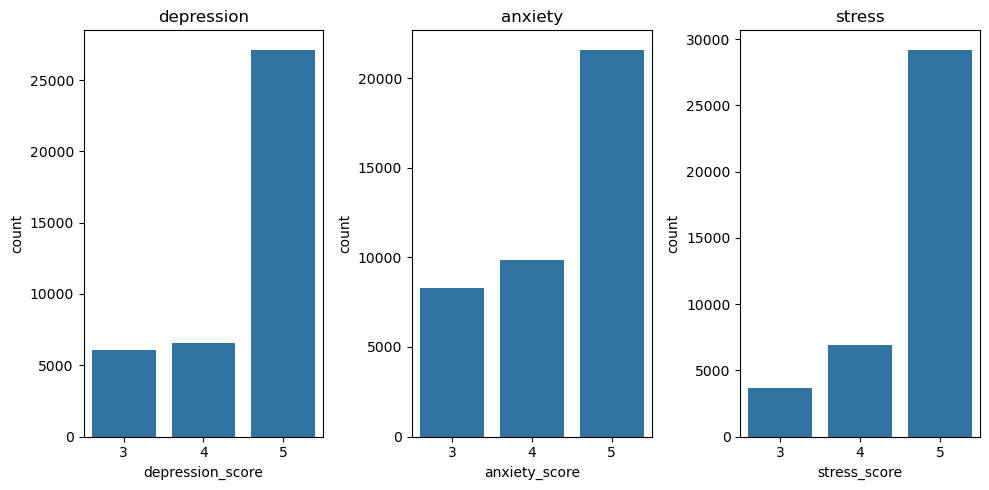

In [239]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes = axes.ravel()
sns.countplot(x = data["depression_score"],ax = axes[0])
axes[0].set_title("depression")
sns.countplot(x = data["anxiety_score"],ax = axes[1])
axes[1].set_title("anxiety")
sns.countplot(x = data["stress_score"],ax = axes[2])
axes[2].set_title("stress")
plt.tight_layout()

([<matplotlib.axis.XTick at 0x31b481690>,
 [Text(0, 0, 'LessthanHigh'),
  Text(1, 0, 'HighSchool'),
  Text(2, 0, 'University'),
  Text(3, 0, 'Graduate')])

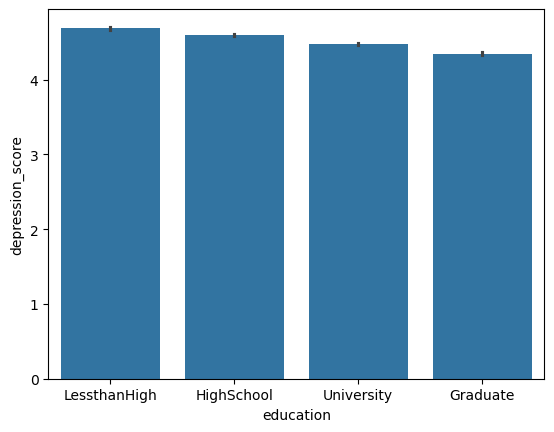

In [240]:
sns.barplot(x="education", y="depression_score", data=data[data["education"] != 0])
plt.xticks(ticks = range(len(data[data["education"] != 0]["education"].unique())), labels = ["LessthanHigh", "HighSchool", "University", "Graduate"])

([<matplotlib.axis.XTick at 0x3177e2850>,
 [Text(0, 0, 'Single'), Text(1, 0, 'Married'), Text(2, 0, 'Divorced')])

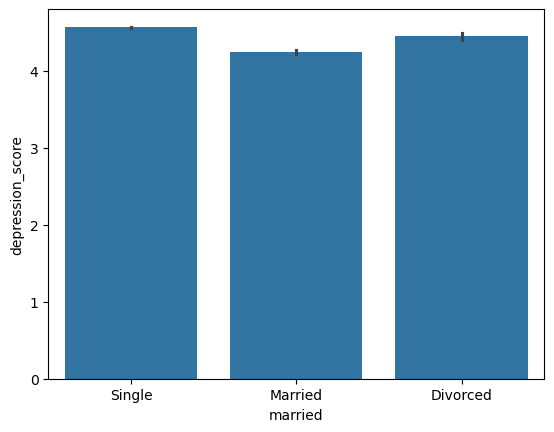

In [241]:
sns.barplot(x="married", y="depression_score", data=data[data["married"] != 0])
plt.xticks(ticks = range(len(data[data["married"] != 0]["married"].unique())), labels = ["Single", "Married", "Divorced"])

<Axes: xlabel='religion', ylabel='depression_score'>

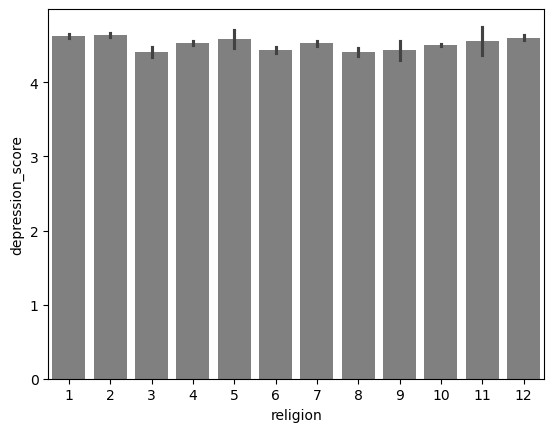

In [242]:
sns.barplot(data = data[data["religion"] != 0], x = "religion", y = "depression_score", color = "grey")

([<matplotlib.axis.XTick at 0x317626590>,
 [Text(0, 0, 'Hetero'),
  Text(1, 0, 'Bi'),
  Text(2, 0, 'Homo'),
  Text(3, 0, 'A'),
  Text(4, 0, 'Other')])

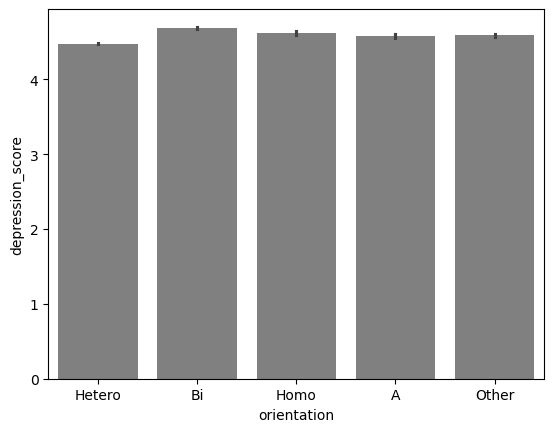

In [243]:
sns.barplot(data = data[data["orientation"] != 0], x = "orientation", y= "depression_score", color = "grey")
plt.xticks(ticks = range(len(data[data["orientation"] != 0]["orientation"].unique())), labels = ["Hetero", "Bi", "Homo", "A", "Other"])

In [244]:
categories = []
for label, item in data.items():
    if pd.api.types.is_object_dtype(item):
        categories.append(label)

In [245]:
categories

['country', 'major']

In [246]:
numericals = []
for label, item in data.items():
    if pd.api.types.is_int64_dtype(item):
        numericals.append(label)

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/3480842869.py:3: DeprecationWarning: is_int64_dtype is deprecated and will be removed in a future version. Use dtype == np.int64 instead.
  if pd.api.types.is_int64_dtype(item):


In [247]:
len(numericals)

178

In [248]:
dropped_questions = []
for i in data.columns:
    if i.startswith("Q") and (i.endswith("I") or i.endswith("E")):
        dropped_questions.append(i)

data = data.drop(dropped_questions, axis=1)

In [249]:
data_copy = data.copy()

In [250]:
data_copy.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'source',
       'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize',
       'uniquenetworklocation', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'major', 'depression_score',
       'anxiety_score', 'stress_score', 'extraversion', 'agreeableness',
       'conscientiousness', 'e

In [251]:
import pickle

data_copy = pd.get_dummies(data, columns=categories)
with open('onehot_columns.pkl', 'wb') as f:
    pickle.dump(data_copy.columns, f)

In [252]:
data_copy.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       ...
       'major_virology', 'major_visual arts', 'major_visual arts and culture',
       'major_water engineering', 'major_web design', 'major_web development',
       'major_writing', 'major_writing ', 'major_yes', 'major_zoology'],
      dtype='object', length=5547)

In [299]:
data_copy

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,major_virology,major_visual arts,major_visual arts and culture,major_water engineering,major_web design,major_web development,major_writing,major_writing,major_yes,major_zoology
0,4,4,2,4,4,4,4,4,2,1,...,False,False,False,False,False,False,False,False,False,False
1,4,1,2,3,4,4,3,4,3,2,...,False,False,False,False,False,False,False,False,False,False
2,3,1,4,1,4,3,1,3,2,4,...,False,False,False,False,False,False,False,False,False,False
3,2,3,2,1,3,3,4,2,3,3,...,False,False,False,False,False,False,False,False,False,False
4,2,2,3,4,4,2,4,4,4,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,False,False,False,False,False,False,False,False,False,False
39771,3,4,3,4,3,4,4,4,3,4,...,False,False,False,False,False,False,False,False,False,False
39772,2,1,2,1,1,1,1,1,2,1,...,False,False,False,False,False,False,False,False,False,False
39773,3,1,2,2,3,3,3,4,3,1,...,False,False,False,False,False,False,False,False,False,False


In [253]:
scores = ["depression_score", "anxiety_score", "stress_score"]

In [254]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_copy, test_size=0.2)

In [255]:
train_data_scores = train_data[scores]

In [256]:
train_data_scores

,depression_score,anxiety_score,stress_score
21993,5,5,5
29761,5,5,5
20259,5,5,5
7877,4,5,4
5172,4,4,4
...,...,...,...
19855,3,3,3
25539,5,5,5
11740,4,4,5
16908,3,4,3


In [257]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data_scores["depression_score"] = le.fit_transform(train_data_scores["depression_score"])
train_data_scores["anxiety_score"] = le.fit_transform(train_data_scores["anxiety_score"])
train_data_scores["stress_score"] = le.fit_transform(train_data_scores["stress_score"])

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/4156877122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_scores["depression_score"] = le.fit_transform(train_data_scores["depression_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/4156877122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_scores["anxiety_score"] = le.fit_transform(train_data_scores["anxiety_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/41568

In [258]:
X = train_data.drop(scores, axis=1)

In [259]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31820 entries, 21993 to 32890
Columns: 5544 entries, Q1A to major_zoology
dtypes: bool(5453), int64(91)
memory usage: 187.8 MB


In [260]:
depression_y = train_data_scores["depression_score"]
anxiety_y = train_data_scores["anxiety_score"]
stress_y = train_data_scores["stress_score"]

## For Predicting Depression

In [261]:
X
depression_y

21993    2
29761    2
20259    2
7877     1
5172     1
        ..
19855    0
25539    2
11740    1
16908    0
32890    2
Name: depression_score, Length: 31820, dtype: int64

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, depression_y_train, depression_y_test = train_test_split(X, depression_y, test_size=0.2, random_state=42)

In [263]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train, depression_y_train)
clf.score(X_test, depression_y_test)

0.8703645505971087

In [264]:
depression_preds = clf.predict(X_test)
depression_preds[:10]

array([2, 0, 2, 2, 2, 2, 2, 0, 2, 2])

In [265]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(depression_preds, depression_y_test)

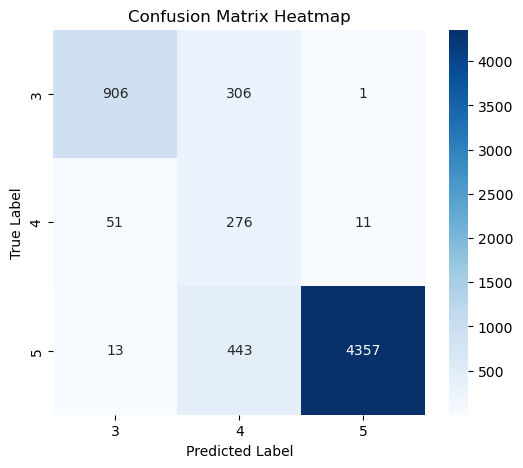

In [266]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [267]:
print(classification_report(depression_preds, depression_y_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1213
           1       0.27      0.82      0.40       338
           2       1.00      0.91      0.95      4813

    accuracy                           0.87      6364
   macro avg       0.73      0.82      0.73      6364
weighted avg       0.95      0.87      0.90      6364



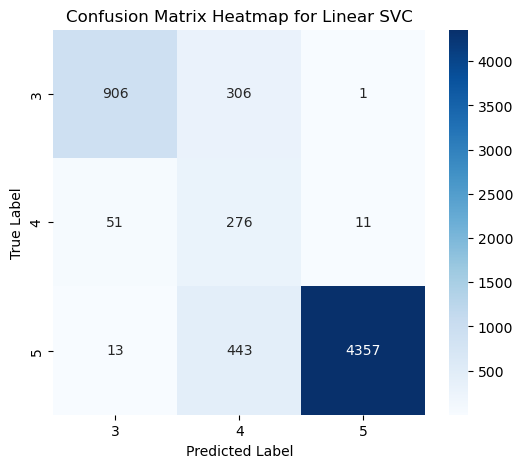

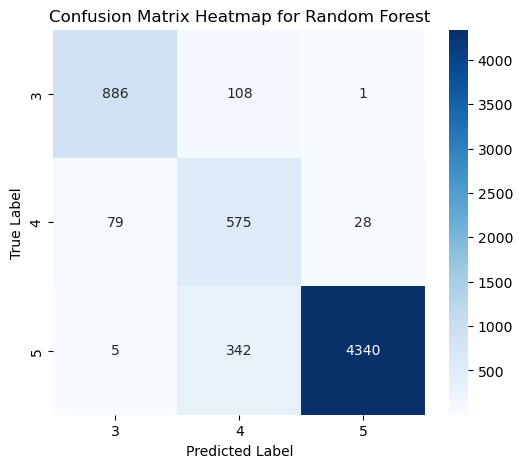

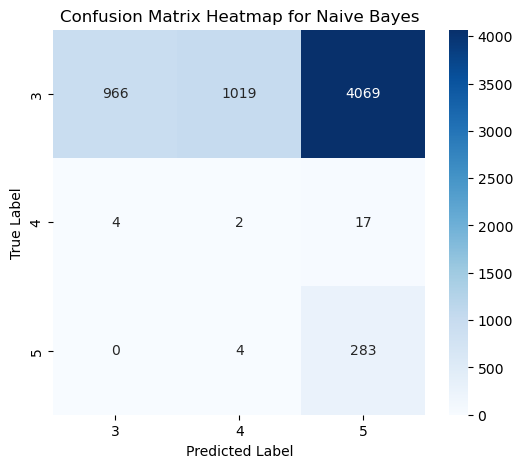

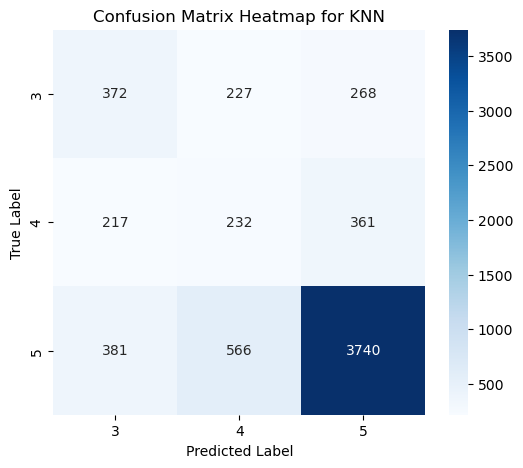

/Users/aryanmanchanda/Projects/aura-check/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


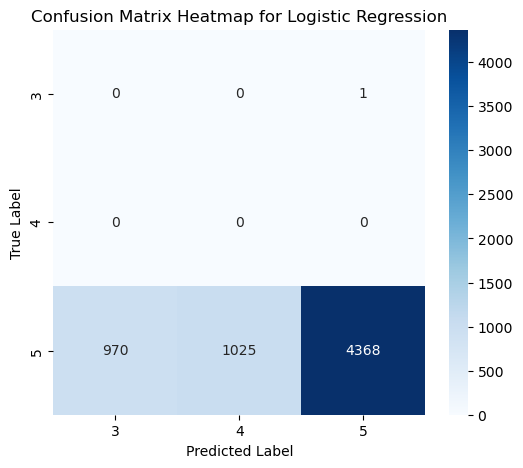

In [268]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {"Linear SVC": LinearSVC(), "Random Forest": RandomForestClassifier(), "Naive Bayes": GaussianNB(), "KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression()}
model_scores = {}

for name, model in  models.items():
    model.fit(X_train, depression_y_train)
    b = model.score(X_test, depression_y_test)
    model_scores[name] = b
    a = model.predict(X_test)
    conf = confusion_matrix(a, depression_y_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.show()

In [269]:
model_scores

{'Linear SVC': 0.8703645505971087,
 'Random Forest': 0.9115336266499057,
 'Naive Bayes': 0.1965744814582024,
 'KNN': 0.6825895663104965,
 'Logistic Regression': 0.6863607793840352}

In [270]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train, depression_y_train)
xgc.score(X_test, depression_y_test)

0.9800439974858579

In [271]:
depression_preds_xgc = xgc.predict(X_test)

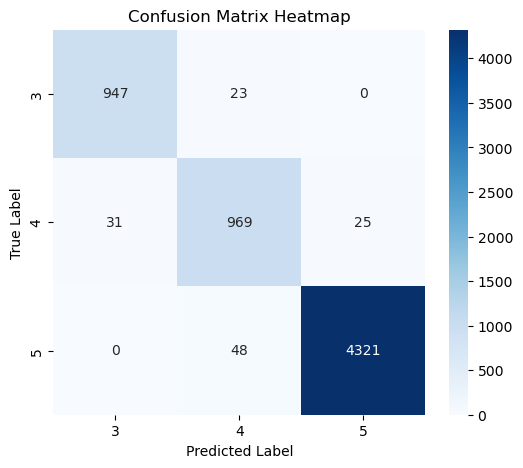

In [272]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(y_pred=depression_preds_xgc, y_true=depression_y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [273]:
print(classification_report(depression_y_test, depression_preds_xgc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       970
           1       0.93      0.95      0.94      1025
           2       0.99      0.99      0.99      4369

    accuracy                           0.98      6364
   macro avg       0.96      0.97      0.97      6364
weighted avg       0.98      0.98      0.98      6364



In [274]:
import pickle

pickle.dump(xgc, open("../models/xgc_model1_depression.pkl", "wb"))

## Anxiety Prediction

In [275]:
X
anxiety_y

21993    2
29761    2
20259    2
7877     2
5172     1
        ..
19855    0
25539    2
11740    1
16908    1
32890    1
Name: anxiety_score, Length: 31820, dtype: int64

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, anxiety_y_train, anxiety_y_test = train_test_split(X, anxiety_y, test_size=0.2)

In [277]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train, anxiety_y_train)
xgc.score(X_test, anxiety_y_test)

0.9684160905091138

In [278]:
anxiety_preds = xgc.predict(X_test)

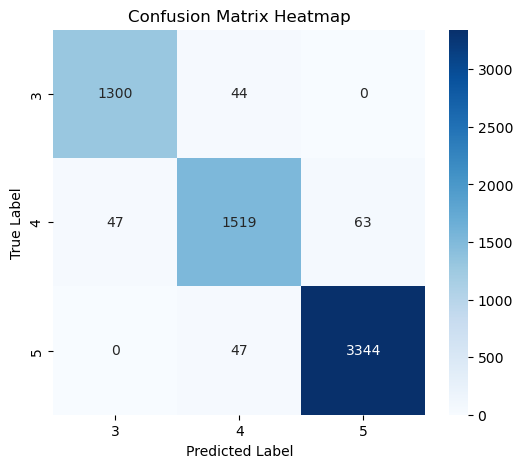

In [279]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(anxiety_preds, anxiety_y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [280]:
print(classification_report(anxiety_y_test, anxiety_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1347
           1       0.93      0.94      0.94      1610
           2       0.99      0.98      0.98      3407

    accuracy                           0.97      6364
   macro avg       0.96      0.96      0.96      6364
weighted avg       0.97      0.97      0.97      6364



In [281]:
import pickle

pickle.dump(xgc, open("../models/xgc_model1_anxiety.pkl", "wb"))

## Stress Prediction

In [282]:
X
stress_y

21993    2
29761    2
20259    2
7877     1
5172     1
        ..
19855    0
25539    2
11740    2
16908    0
32890    2
Name: stress_score, Length: 31820, dtype: int64

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, stress_y_train, stress_y_test = train_test_split(X, stress_y, test_size=0.2)

In [284]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train, stress_y_train)
xgc.score(X_test, stress_y_test)

0.9754871150219987

In [285]:
stress_preds = xgc.predict(X_test)

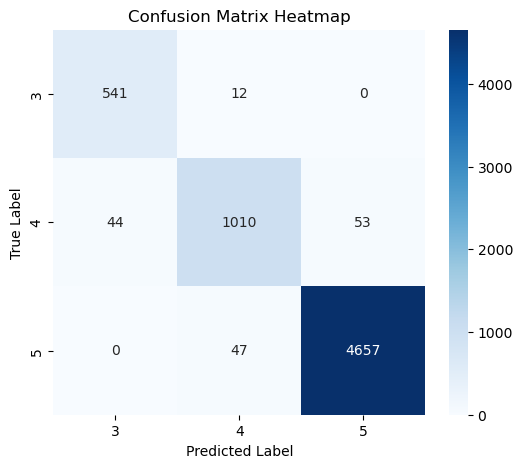

In [286]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(stress_preds, stress_y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [287]:
print(classification_report(stress_y_test, stress_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       585
           1       0.91      0.94      0.93      1069
           2       0.99      0.99      0.99      4710

    accuracy                           0.98      6364
   macro avg       0.96      0.95      0.96      6364
weighted avg       0.98      0.98      0.98      6364



In [288]:
import pickle

pickle.dump(xgc, open("../models/xgc_model1_stress.pkl", "wb"))

## Testing

In [289]:
test_data

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,major_virology,major_visual arts,major_visual arts and culture,major_water engineering,major_web design,major_web development,major_writing,major_writing,major_yes,major_zoology
16403,2,1,1,1,1,1,1,1,2,2,...,False,False,False,False,False,False,False,False,False,False
6011,3,3,2,3,3,2,3,3,3,3,...,False,False,False,False,False,False,False,False,False,False
27809,3,3,2,4,2,4,4,3,3,2,...,False,False,False,False,False,False,False,False,False,False
39106,3,2,2,2,3,2,2,3,3,1,...,False,False,False,False,False,False,False,False,False,False
26385,1,3,1,4,2,3,4,4,4,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,3,1,2,1,1,2,1,2,2,2,...,False,False,False,False,False,False,False,False,False,False
20051,2,3,2,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2168,4,1,4,2,3,4,1,4,1,4,...,False,False,False,False,False,False,False,False,False,False
27230,4,2,3,3,3,3,3,3,4,3,...,False,False,False,False,False,False,False,False,False,False


In [290]:
X = test_data.drop(scores, axis=1)

In [291]:
test_data_scores = test_data[scores]
test_data_scores

,depression_score,anxiety_score,stress_score
16403,4,4,4
6011,5,5,5
27809,5,5,5
39106,5,5,5
26385,4,5,5
...,...,...,...
5073,5,4,5
20051,3,3,3
2168,5,3,5
27230,5,5,5


In [292]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_data_scores["depression_score"] = le.fit_transform(test_data_scores["depression_score"])
test_data_scores["anxiety_score"] = le.fit_transform(test_data_scores["anxiety_score"])
test_data_scores["stress_score"] = le.fit_transform(test_data_scores["stress_score"])

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/308710127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_scores["depression_score"] = le.fit_transform(test_data_scores["depression_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/308710127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_scores["anxiety_score"] = le.fit_transform(test_data_scores["anxiety_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_16633/308710127.p

In [293]:
test_data_scores

,depression_score,anxiety_score,stress_score
16403,1,1,1
6011,2,2,2
27809,2,2,2
39106,2,2,2
26385,1,2,2
...,...,...,...
5073,2,1,2
20051,0,0,0
2168,2,0,2
27230,2,2,2


In [294]:
test_depression = test_data_scores["depression_score"]
test_anxiety = test_data_scores["anxiety_score"]
test_stress = test_data_scores["stress_score"]

In [295]:
import pickle

model = pickle.load(open("../models/xgc_model1_anxiety.pkl", 'rb'))

In [296]:
test_preds_anxiety = model.predict(X)

In [297]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_anxiety, test_preds_anxiety))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1610
           1       0.93      0.95      0.94      2025
           2       0.99      0.98      0.98      4320

    accuracy                           0.97      7955
   macro avg       0.96      0.97      0.96      7955
weighted avg       0.97      0.97      0.97      7955



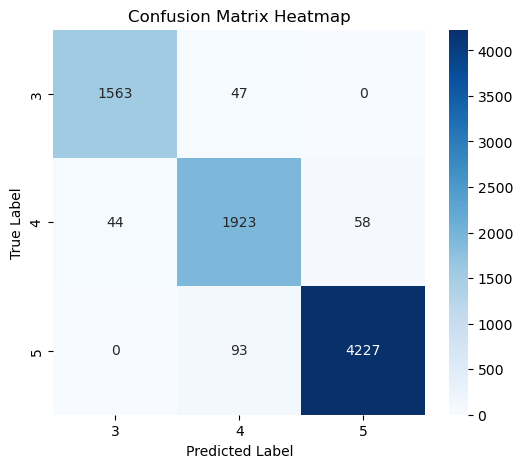

In [298]:
conf = confusion_matrix(y_true=test_anxiety, y_pred=test_preds_anxiety)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()